**1. Dataset Loading**

In [164]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
start_date = '2023-12-1'
end_date = '2024-12-1'
start_date , end_date

('2023-12-1', '2024-12-1')

In [166]:
df = yf.download(tickers='AAPL',start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-01,190.307693,191.240005,191.559998,189.229996,190.330002,45679300
2023-12-04,188.506500,189.429993,190.050003,187.449997,189.979996,43389500
2023-12-05,192.477051,193.419998,194.399994,190.179993,190.210007,66628400
2023-12-06,191.382431,192.320007,194.759995,192.110001,194.449997,41089700
2023-12-07,193.322922,194.270004,195.000000,193.589996,193.630005,47477700
...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


In [167]:
df.shape

(251, 6)

In [168]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-01,190.307693,191.240005,191.559998,189.229996,190.330002,45679300
2023-12-04,188.506500,189.429993,190.050003,187.449997,189.979996,43389500
2023-12-05,192.477051,193.419998,194.399994,190.179993,190.210007,66628400
2023-12-06,191.382431,192.320007,194.759995,192.110001,194.449997,41089700
2023-12-07,193.322922,194.270004,195.000000,193.589996,193.630005,47477700


In [169]:
apple_df = df.reset_index()['Close']
apple_df

Ticker,AAPL
0,191.240005
1,189.429993
2,193.419998
3,192.320007
4,194.270004
...,...
246,229.869995
247,232.869995
248,235.059998
249,234.929993


**2. Data Pre-Processing**

In [170]:
#checking for null values
apple_df.isna().sum()

Ticker
AAPL    0
dtype: int64

In [171]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [172]:
apple_df.rename(columns={'AAPL': 'Close'}, inplace=True)


In [173]:
#sort the indexes
apple_df.sort_index(inplace = True)

In [174]:
apple_df.head()

Ticker,Close
0,191.240005
1,189.429993
2,193.419998
3,192.320007
4,194.270004


In [175]:
# Apply log transformation to CLOSE to stabilize variance
apple_df['Close'] = np.log(apple_df['Close'])

In [176]:
apple_df.head()

Ticker,Close
0,5.253529
1,5.244020
2,5.264864
3,5.259161
4,5.269249


In [177]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(apple_df[apple_df.columns])

In [178]:
scaled_values

array([[0.40600071],
       [0.3798397 ],
       [0.43718249],
       [0.42149282],
       [0.44924552],
       [0.46956166],
       [0.43376681],
       [0.45546919],
       [0.50100822],
       [0.50309185],
       [0.49558318],
       [0.47209055],
       [0.48679691],
       [0.45716403],
       [0.4550451 ],
       [0.43974153],
       [0.43191506],
       [0.43333957],
       [0.43945726],
       [0.42449494],
       [0.32424169],
       [0.30356589],
       [0.26840431],
       [0.2573423 ],
       [0.3230559 ],
       [0.31682223],
       [0.3323801 ],
       [0.3235006 ],
       [0.32838785],
       [0.29429331],
       [0.28002411],
       [0.36819732],
       [0.41059994],
       [0.44385914],
       [0.46210144],
       [0.45250048],
       [0.44782901],
       [0.42292274],
       [0.4130402 ],
       [0.35957909],
       [0.3058045 ],
       [0.34226165],
       [0.32735201],
       [0.35430731],
       [0.37795128],
       [0.37954939],
       [0.36367259],
       [0.371

In [179]:
apple_scaled_df = pd.DataFrame(scaled_values, columns = apple_df.columns, index = apple_df.index)

In [180]:
apple_scaled_df.head()

Ticker,Close
0,0.406001
1,0.379840
2,0.437182
3,0.421493
4,0.449246


**Plotting the CLOSE Column**

<Axes: >

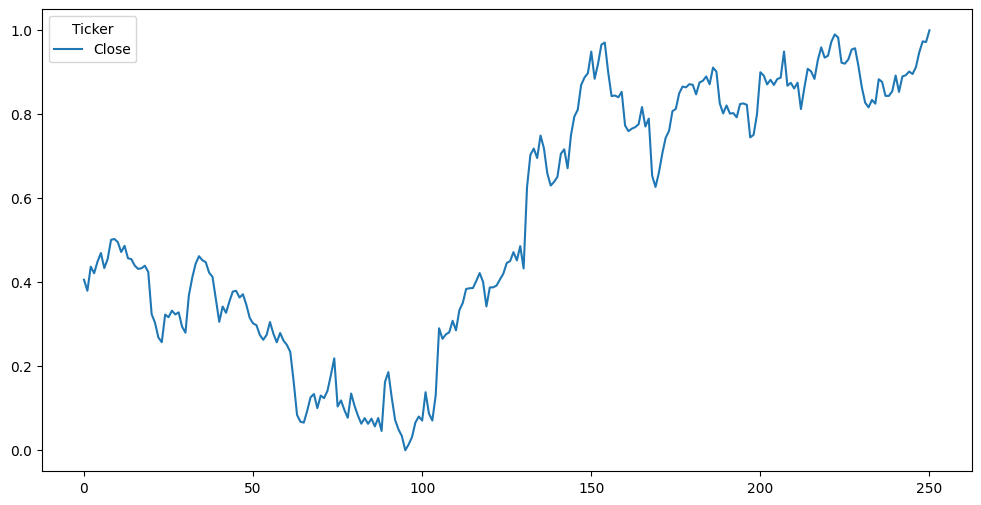

In [197]:
apple_scaled_df.plot(figsize=(12,6))

**Sliding Window Sequences**

In [182]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)

In [183]:
X.shape, y.shape

((191, 60, 1), (191, 1))

In [184]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((152, 60, 1), (152, 1), (39, 60, 1), (39, 1))

In [185]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 1, 1)

**Building the LSTM model** 

In [186]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [187]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [188]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [189]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - RootMeanSquaredError: 0.3426 - loss: 0.1269 - val_RootMeanSquaredError: 0.1156 - val_loss: 0.0134
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - RootMeanSquaredError: 0.1655 - loss: 0.0275 - val_RootMeanSquaredError: 0.1277 - val_loss: 0.0163
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - RootMeanSquaredError: 0.1412 - loss: 0.0200 - val_RootMeanSquaredError: 0.1144 - val_loss: 0.0131
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - RootMeanSquaredError: 0.1747 - loss: 0.0309 - val_RootMeanSquaredError: 0.1050 - val_loss: 0.0110
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - RootMeanSquaredError: 0.1358 - loss: 0.0188 - val_RootMeanSquaredError: 0.1003 - val_loss: 0.0101
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - RootMeanSquaredError: 0.1422 - loss: 0.0203 - val_RootMeanSquaredError: 0.1144 - val_loss: 0.0131
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - RootMeanSquaredError: 0.1145 - lo

In [190]:
# Making predictions on the test data
predictions = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000013E7DDA7100> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 721ms/step


In [191]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

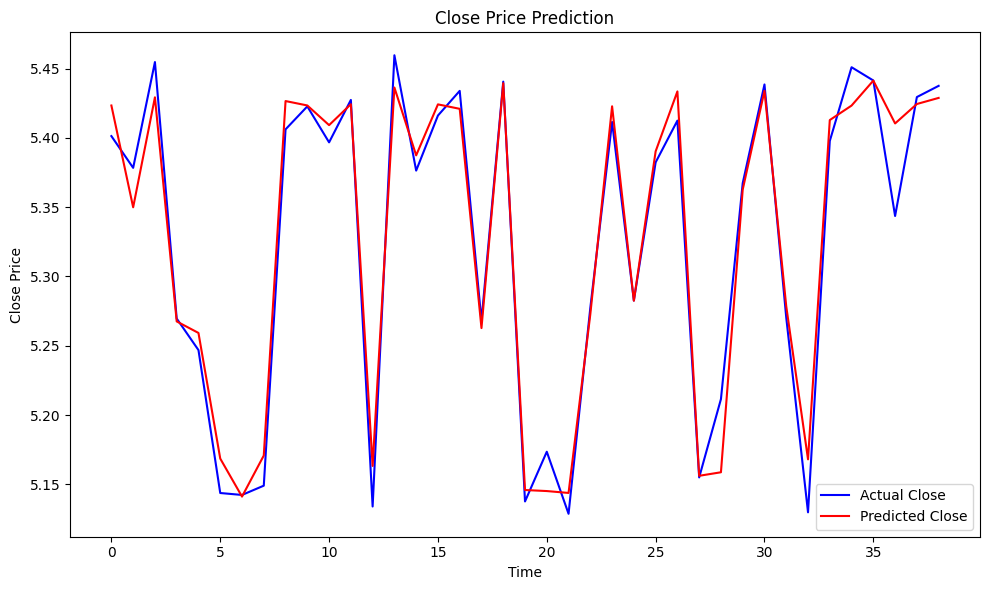

In [195]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
plt.title(f'{col} Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{col} Price')
plt.legend()

plt.tight_layout()